# U-Net

In [10]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from deeply.model.unet import (
    UNet,
    AttentionUNet,
    Trainer,
    generate_toy
)
from deeply.plots import segplot, history as history_plot

In [12]:
width, height, channels = (256, 256, 3)

In [13]:
train, val, test = generate_toy(x = width, y = height, channels = channels)

#### Generate Samples

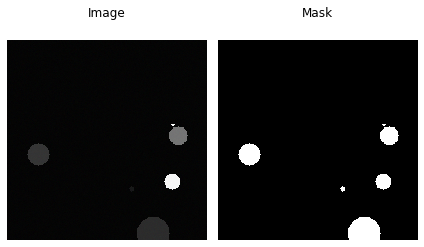

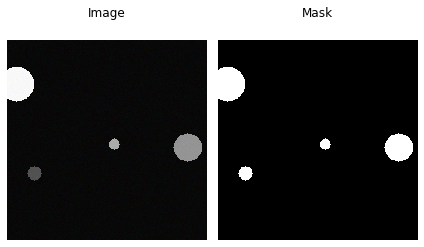

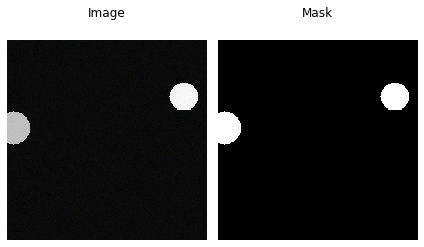

In [14]:
n_samples = 3
samples   = train.take(n_samples)

for image, mask in samples:
    segplot(image, mask)

In [15]:
unet = UNet(
    x = width,
    y = height,
    channels = channels,
    n_classes = 1,
    batch_norm = False,
    layer_depth = 2,
    init_filters = 16,
    final_activation = "sigmoid",
    backbone = "efficient-net-b7"
)

In [16]:
# unet.plot(show_shapes = True)

In [17]:
unet.compile(optimizer = "adam")

In [18]:
batch_size = 1
epochs     = 1

Begin Training...


2021-12-01 20:53:53.568344: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Begin Training Batch...
41/60 [===================>..........] - ETA: 1:16 - loss: 0.3298 - categorical_accuracy: 0.5549 - dice_coefficient: 0.1205 - jaccard_index: 0.1134 - tversky_index: 0.2327Begin Training Batch...


60/60 [==============================] - 368s 5s/step - loss: 0.4679 - categorical_accuracy: 0.6958 - dice_coefficient: 0.1453 - jaccard_index: 0.1373 - tversky_index: 0.2543 - val_loss: 0.2773 - val_categorical_accuracy: 1.0000 - val_dice_coefficient: 0.1059 - val_jaccard_index: 0.1059 - val_tversky_index: 0.2138


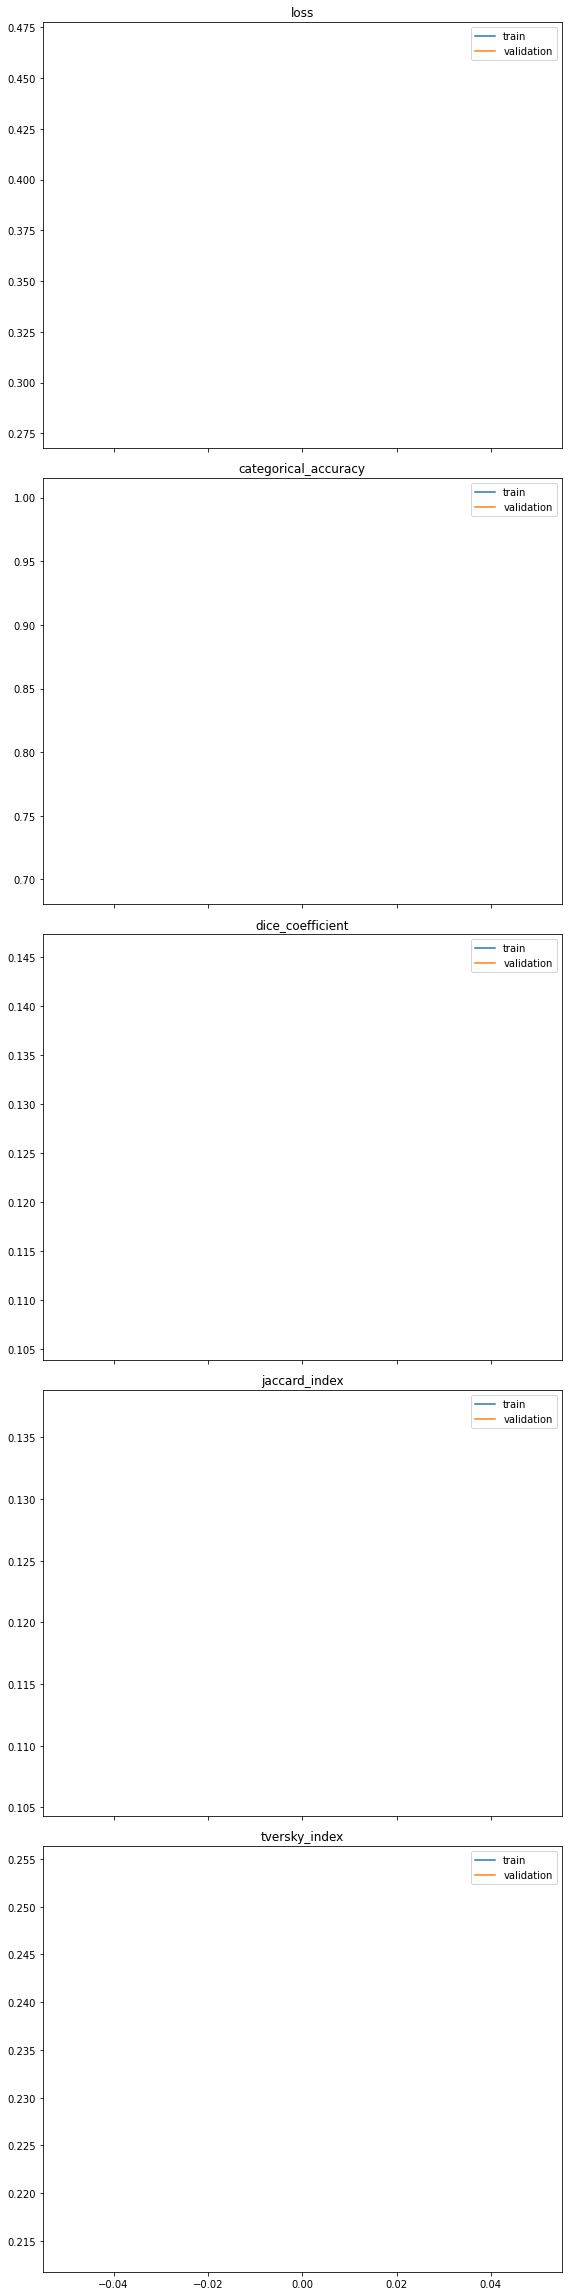

In [19]:
trainer = Trainer()
history = trainer.fit(unet, train, val = val, batch_size = batch_size, epochs = epochs)

In [ ]:
predicted = unet.predict(test.batch(batch_size))

In [ ]:
for i, (image, mask) in enumerate(test.take(n_samples)):
    segplot(image, mask, predicted[i])

In [ ]:
history_plot(history)